The aim of the project is to predict how many customers will churn the bank and identify them, in order to take some actions to prevent the exit. 
The goal of the project are the following:

-Predict the odds of every client to churn the bank.
In order to do that we are going to use a Logistic Regression.

-Classify the customers in two class: 0=Stay in the bank, 1= Leave the bank.
To do that we are going to use other tools that are more precise.

I'll try to keep the report more user friendly as possible by describing every important cell code.


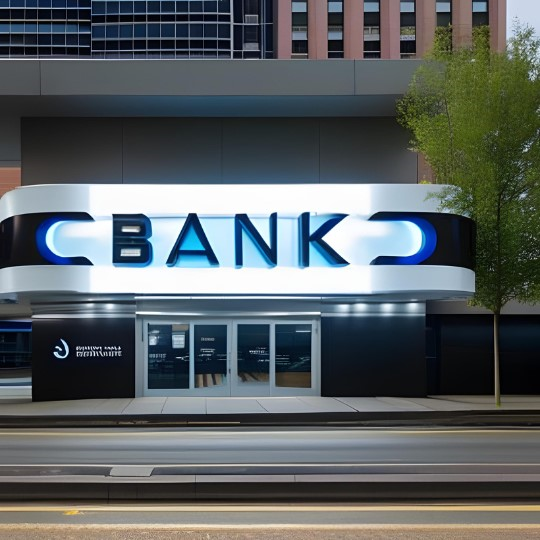

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

The dataframe that I am gonna use is made up by ten thousand rows with qualitaitive and quantitative variables.

In [2]:
path= r"C:\Users\Utente\Desktop\Various Datasets\bankchurn\bankchurns.csv"
df= pd.read_csv(path)
df=df.drop('RowNumber',axis=1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.shape

(10000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction_Score  10000 non-null  int64  
 15  Card_Type           10000 non-null  object 
 16  Point

Cleaning the dataframe and splitting it into quantitative and qualitative variable.

In [5]:
df=df.drop('Surname',axis=1)


Here some statistical info about the quantitative variables.

In [6]:
df_quant=df.drop(['Geography','Gender','Card_Type'],axis=1,inplace=False)
df_quant.drop('CustomerId',axis=1).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Let's visualize some important data.

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px

In [37]:
fig1= px.histogram(df, x='Age', title='Age Distribution',color_discrete_sequence=["#490ED1"])
fig1.update_layout(bargap=0.5)
fig1

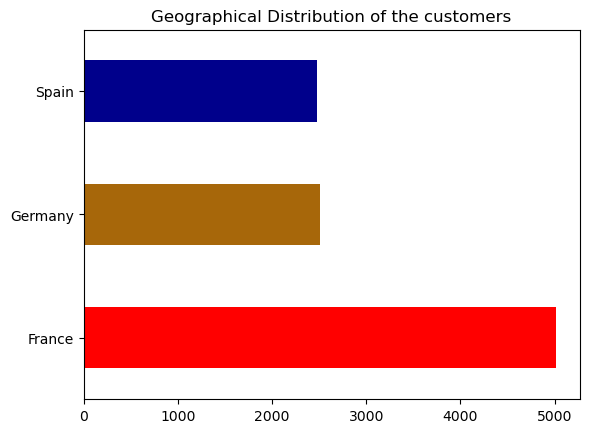

In [9]:
df['Geography'].value_counts().plot(kind='barh', color=['red','#A7670A','darkblue'])
plt.title("Geographical Distribution of the customers");


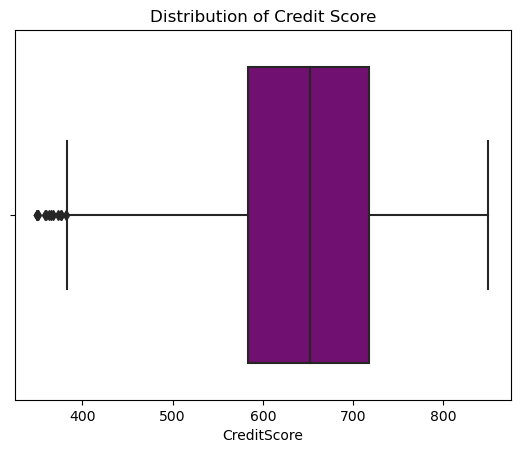

In [10]:
sns.boxplot(data=df,x='CreditScore', color='purple')
plt.title("Distribution of Credit Score");

In [38]:
# Check for low and high cardinal variables
df.nunique()

CustomerId            10000
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction_Score        5
Card_Type                 4
Point_Earned            785
dtype: int64

[Text(0.5, 1.0, 'Correlation analysis')]

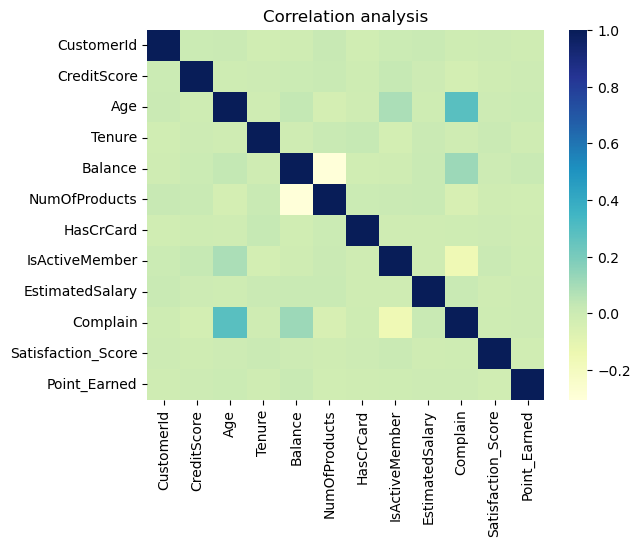

In [12]:
correlation= df.drop('Exited',axis=1).select_dtypes('number').corr()
sns.heatmap(correlation, cmap='YlGnBu').set(title='Correlation analysis')

Now we can start to preprocess our data

 # Encoding
 Trasforming the qualitative variables into quantitative.

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['Geography']=lb.fit_transform(df['Geography'])
df['Gender']=lb.fit_transform(df['Gender'])
df['Card_Type']=lb.fit_transform(df['Card_Type'])

In [14]:
X=df.drop(columns='Exited')
y=df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape


(7000, 15)

In [15]:
print(y_train.value_counts())



0    5546
1    1454
Name: Exited, dtype: int64


The datasets is imbalanced because we have 1645 "exited" observations and 6355 "stayed" observations.

In [16]:
base_accuracy = y_train.value_counts(normalize=True).max()
print(f'The baseline is {base_accuracy:.2f}')

The baseline is 0.79


Thus, the base accuracy is distorted, let's fix this.
# Rebalancing the dataset

In order to do that I'm going to use first a Random under sampler, which is a function that will reduce the number of observations of the most represented class in order to create a balanced train dataset.

Moreover, I'm gonna use also RandomOverSampler which basically do the opposite work and finally I'll use SMOTE (Synthetic Minority Over-sampling Technique) which is another OverSampler.

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE

rus=RandomUnderSampler(random_state=42)
ros=RandomOverSampler(random_state=42)
smote=SMOTE(random_state=42)

X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

print('Undersampling : X shape is', X_train_rus.shape,
      ' and y shape is ',y_train_rus.shape)
print('Oversampling: X shape is', X_train_ros.shape,
      ' and y shape is ',y_train_ros.shape)
print('SMOTE: X shape is', X_train_smote.shape,
      ' and y shape is ',y_train_smote.shape)

Undersampling : X shape is (2908, 15)  and y shape is  (2908,)
Oversampling: X shape is (11092, 15)  and y shape is  (11092,)
SMOTE: X shape is (11092, 15)  and y shape is  (11092,)


In [18]:
print(y_train_rus.value_counts())

0    1454
1    1454
Name: Exited, dtype: int64


In [19]:
trainsets={}
trainsets['Undersample']=X_train_rus,y_train_rus
trainsets['Oversample']=X_train_ros,y_train_ros

In [20]:
base_accuracy_over = y_train_rus.value_counts(normalize=True).max()
print('The baseline is',base_accuracy_over)

The baseline is 0.5


Now we have a perfecly balanced datasets if considering the exited or non exited value.

# Modelling

In the code below I am going to use the grid search funtion in order to find the besr parameters to tune the Logistic R>egression and then create the model itself.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [44]:
param_grid1 = {
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'penalty': ['l1', 'l2'], # Regularization penalty
    'max_iter':[10000,15000] # max number of iterations
}
    
grid_search = GridSearchCV(estimator=model, param_grid=param_grid1, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [45]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
models={}
# for key,trainsets in trainsets.items():
#     models[key]=model.fit(trainsets)
models['Log Reg Undersampling']=best_model.fit(X_train_rus, y_train_rus)
models['Log Reg Oversampling']=best_model.fit(X_train_ros, y_train_ros)
models['Log Reg SMOTE']=best_model.fit(X_train_smote, y_train_smote)

Predicting the output for the test dataset.

In [26]:
preds={}
preds_proba={}
for key,models in models.items():
    preds[key]= models.predict(X_val)
    preds_proba[key]= models.predict_proba(X_val)
    
preds.items()
preds_proba.items()

dict_items([('Log Reg Undersampling', array([[9.97978374e-01, 2.02162563e-03],
       [9.99859262e-01, 1.40738178e-04],
       [9.88622349e-01, 1.13776510e-02],
       ...,
       [9.99928430e-01, 7.15700748e-05],
       [9.99752738e-01, 2.47262027e-04],
       [9.99133347e-01, 8.66653425e-04]])), ('Log Reg Oversampling', array([[9.97978374e-01, 2.02162563e-03],
       [9.99859262e-01, 1.40738178e-04],
       [9.88622349e-01, 1.13776510e-02],
       ...,
       [9.99928430e-01, 7.15700748e-05],
       [9.99752738e-01, 2.47262027e-04],
       [9.99133347e-01, 8.66653425e-04]])), ('Log Reg SMOTE', array([[9.97978374e-01, 2.02162563e-03],
       [9.99859262e-01, 1.40738178e-04],
       [9.88622349e-01, 1.13776510e-02],
       ...,
       [9.99928430e-01, 7.15700748e-05],
       [9.99752738e-01, 2.47262027e-04],
       [9.99133347e-01, 8.66653425e-04]]))])

# Evaluation of the model

In [27]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score

In [28]:
recalls={}
accuracies={}
f1_scores={}
roc_auc_scores={}

for key, preds in preds.items():
    recalls[key] = recall_score(y_val, preds)
    accuracies[key]= accuracy_score(y_val,preds)
    f1_scores[key]=f1_score(y_val,preds)
    roc_auc_scores[key]=roc_auc_score(y_val,preds)
    
    
print('Recalls:',recalls)
print('Accuracies:',accuracies)
print('F1:',  f1_scores)
print('ROC-AUC:',roc_auc_scores)


Recalls: {'Log Reg Undersampling': 0.9982876712328768, 'Log Reg Oversampling': 0.9982876712328768, 'Log Reg SMOTE': 0.9982876712328768}
Accuracies: {'Log Reg Undersampling': 0.9986666666666667, 'Log Reg Oversampling': 0.9986666666666667, 'Log Reg SMOTE': 0.9986666666666667}
F1: {'Log Reg Undersampling': 0.9965811965811966, 'Log Reg Oversampling': 0.9965811965811966, 'Log Reg SMOTE': 0.9965811965811966}
ROC-AUC: {'Log Reg Undersampling': 0.9985229746892861, 'Log Reg Oversampling': 0.9985229746892861, 'Log Reg SMOTE': 0.9985229746892861}


In [29]:
print(max(recalls),
      max(accuracies),
      max(f1_scores),
      max(roc_auc_scores))

Log Reg Undersampling Log Reg Undersampling Log Reg Undersampling Log Reg Undersampling


See that the Undersampled model has highers recall metrics I'll use this one to develop the analysis.
I choose the recall as control metric because in this case we want to maximize the detenction of customer that could leave the bank, even if we classify as possible leavers someone that don't wanna leave is not a big deal.

# Threshold optimization
Now I want to find the threshold that maximize the f1 score for the model.

In [30]:
thresholds=np.arange(0.2,0.6,0.01)
print(thresholds)


[0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33
 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47
 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59]


In [31]:
preds_proba_true=preds_proba.get('Log Reg Undersampling')[:,1]
preds_proba_true

array([2.02162563e-03, 1.40738178e-04, 1.13776510e-02, ...,
       7.15700748e-05, 2.47262027e-04, 8.66653425e-04])

In [32]:
list={}
for threshold in thresholds:
        predictions=(preds_proba_true>=threshold).astype(int)
        metric=f1_score(y_val,predictions)
        i=(1+threshold)
        list[i]=threshold,metric
        print((f'Threshold:{threshold:.2f} | Metric:{metric:.4f} |Predictions: {predictions[1:18]}',{i}))

('Threshold:0.20 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.2})
('Threshold:0.21 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.21})
('Threshold:0.22 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.22})
('Threshold:0.23 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.23})
('Threshold:0.24 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.24})
('Threshold:0.25 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.25})
('Threshold:0.26 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.26})
('Threshold:0.27 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.27})
('Threshold:0.28 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.28})
('Threshold:0.29 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0]', {1.29})
('Threshold:0.30 | Metric:0.9966 |Predictions: [0 0 0 0 0 0 1 0 0 1 1 1

In [33]:
list.items()

dict_items([(1.2, (0.2, 0.9965811965811966)), (1.21, (0.21000000000000002, 0.9965811965811966)), (1.22, (0.22000000000000003, 0.9965811965811966)), (1.23, (0.23000000000000004, 0.9965811965811966)), (1.24, (0.24000000000000005, 0.9965811965811966)), (1.25, (0.25000000000000006, 0.9965811965811966)), (1.26, (0.26000000000000006, 0.9965811965811966)), (1.27, (0.2700000000000001, 0.9965811965811966)), (1.28, (0.2800000000000001, 0.9965811965811966)), (1.29, (0.2900000000000001, 0.9965811965811966)), (1.3, (0.3000000000000001, 0.9965811965811966)), (1.31, (0.3100000000000001, 0.9965811965811966)), (1.32, (0.3200000000000001, 0.9965811965811966)), (1.33, (0.3300000000000001, 0.9965811965811966)), (1.34, (0.34000000000000014, 0.9965811965811966)), (1.35, (0.35000000000000014, 0.9965811965811966)), (1.36, (0.36000000000000015, 0.9965811965811966)), (1.37, (0.37000000000000016, 0.9965811965811966)), (1.3800000000000001, (0.38000000000000017, 0.9965811965811966)), (1.3900000000000001, (0.390000

In [34]:
list1=pd.DataFrame(list)
list1

,1.20,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,...,1.50,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59
0,0.200000,0.210000,0.220000,0.230000,0.240000,0.250000,0.260000,0.270000,0.280000,0.290000,...,0.500000,0.510000,0.520000,0.530000,0.540000,0.550000,0.560000,0.570000,0.580000,0.590000
1,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,...,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581,0.996581


In [35]:
print((f'{roc_auc_score(y_val,preds)*100}%'))

99.85229746892861%


As you can see in the previous dataframe the metric doesn't increase nor increase by changing the threshold. That's a good point for the model, indeed as you can see the ROC AUC Score gets almost the full score.

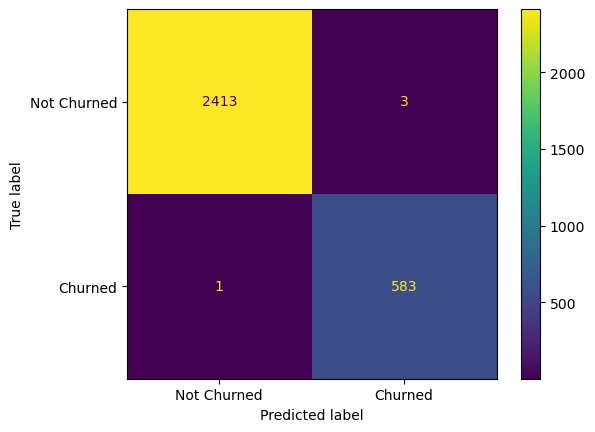

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val,preds), display_labels = ['Not Churned', 'Churned'])
print(cmd.plot())

# Conclusion

The final model is outstanding, it can predict with incredible accuracy if the customer will leave the bank or not. As we can see in the graphics above it made only four errors, predicting on a dataset of 3000 individuals.